# Classification Textual Analsysis Tool

This tool allows you to search CPA and CN classifications for keywords and mappings.

A Natural Language Processing embedding for the textual descriptions allows for associations for similar products

Method:
* Load CPA classification data and removal of unwanted text
* Vectorize (with FastText)
* Dimension reduction using UMAP
* Clustering (HDBSCAN)


In [1]:
# this bit shouldn't be necessary if we pip install -e .   in the parent directory
%load_ext autoreload
%autoreload 2

import functools
from pprint import pprint
from time import time
from IPython.display import display, HTML
import logging
import pandas as pd
import numpy as np
import plotly.express

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
from ipywidgets import Layout, Label
from ipywidgets import HBox, VBox

import text_processing



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
# Read in the vectorized CPA file
outpath = '../data/output/'
from ast import literal_eval
df = pd.read_csv(outpath + 'CPA_Vectorized.csv', converters={x : literal_eval for x in ['Descr_Low_dim','Full_descr_Low_dim'] })


Code  Level                                          Descr_old  \
0        A      1      PRODUCTS OF AGRICULTURE, FORESTRY AND FISHING   
1       01      2  Products of agriculture, hunting and related s...   
2     01.1      3                                Non-perennial crops   
3    01.11      4  Cereals (except rice), leguminous crops and oi...   
4  01.11.1      5                                              Wheat   

                                               Descr  \
0      PRODUCTS OF AGRICULTURE, FORESTRY AND FISHING   
1  Products of agriculture, hunting and related s...   
2                                Non-perennial crops   
3           Cereals , leguminous crops and oil seeds   
4                                              Wheat   

                                            Includes  Category_0 Category_1  \
0                                                NaN           1          A   
1                                                NaN           1          A   
2                                                NaN           1          A   
3  cereals, leguminous crops and oil seeds grown ...           1          A   
4                                                NaN           1          A   

   Category_2                                         Full_descr  \
0         NaN      PRODUCTS OF AGRICULTURE, FORESTRY AND FISHING   
1         1.0  Products of agriculture, hunting and related s...   
2         1.0                                Non-perennial crops   
3         1.0  Cereals (except rice), leguminous crops and oi...   
4         1.0                                              Wheat   

                                   Descr_cleaned  \
0          products agriculture forestry fishing   
1  products agriculture hunting related services   
2                            non-perennial crops   
3            cereals  leguminous crops oil seeds   
4                                          wheat   

                                  Full_descr_cleaned  \
0              products agriculture forestry fishing   
1      products agriculture hunting related services   
2                                non-perennial crops   
3  cereals except rice leguminous crops oil seeds...   
4                                              wheat   

                            Descr_cleaned_vectorized  \
0  [ 0.05488733  0.10263896 -0.09368554  0.192507...   
1  [-5.75589947e-02  7.06852693e-03 -2.01931238e-...   
2  [-8.64876583e-02  8.24822634e-02 -4.48150858e-...   
3  [-0.10483947  0.08535167 -0.15049092  0.279067...   
4  [ 6.82471097e-02  5.72879892e-03 -2.74024643e-...   

                       Full_descr_cleaned_vectorized  \
0  [ 0.05488733  0.10263896 -0.09368554  0.192507...   
1  [-5.75589947e-02  7.06852693e-03 -2.01931238e-...   
2  [-8.64876583e-02  8.24822634e-02 -4.48150858e-...   
3  [-1.18547939e-01  5.04027009e-02 -1.78903893e-...   
4  [ 6.82471097e-02  5.72879892e-03 -2.74024643e-...   

                                       Descr_Low_dim  \
0  [9.782013893127441, 1.1794471740722656, 5.1638...   
1  [9.839007377624512, 1.2820829153060913, 5.2272...   
2  [10.388669967651367, 1.821526050567627, 4.9005...   
3  [10.399946212768555, 1.8477202653884888, 4.974...   
4  [10.288265228271484, 1.6963021755218506, 5.098...   

                                  Full_descr_Low_dim  
0  [7.857229709625244, 2.899494171142578, 7.96546...  
1  [7.566081523895264, 2.695783853530884, 8.35702...  
2  [7.779312610626221, 5.458115577697754, 1.71021...  
3  [7.780141830444336, 5.375428199768066, 1.47510...  
4  [7.749256610870361, 5.295769214630127, 1.36120...

### Clustering

In [33]:
df1 = df[df.Level==6].copy()
df2 = df[df.Level==6].copy()
df1["label"] = text_processing.cluster(df1.Descr_Low_dim)
df2["label"] = text_processing.cluster(df2.Full_descr_Low_dim)
df1 = df1.drop(['Descr_cleaned_vectorized', 'Full_descr_cleaned_vectorized','Descr_Low_dim'], axis=1).rename(columns={'Full_descr_Low_dim':'Low_dim'})
df2 = df2.drop(['Descr_cleaned_vectorized', 'Full_descr_cleaned_vectorized','Full_descr_Low_dim'], axis=1).rename(columns={'Descr_Low_dim':'Low_dim'})
text_processing.show_group(df1[df1.Includes.notnull()], 'Code', '01.11')
text_processing.show_group(df2[df2.Includes.notnull()], 'Code', '01.11')

Code  Level                Descr_old                    Descr  \
19  01.11.50      6  Cereals straw and husks  Cereals straw and husks   
22  01.11.62      6              Peas, green              Peas, green   

                                             Includes  Category_0 Category_1  \
19  unprepared straw, whether or not chopped, grou...           1          A   
22                         green peas and forage peas           1          A   

    Category_2                                         Full_descr  \
19         1.0  Cereals straw and husksunprepared straw, wheth...   
22         1.0              Peas, greengreen peas and forage peas   

          Descr_cleaned                                 Full_descr_cleaned  \
19  cereals straw husks  cereals straw husksunprepared straw whether ch...   
22           peas green                   peas greengreen peas forage peas   

                                              Low_dim label  
19  [10.37432861328125, 1.7721384763717651, 5.0943...    -1  
22  [10.237520217895508, 1.910762906074524, 5.0742...   115

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2020-12-10 18:19:03,215 - text_processing - INFO - cleanded CPA File imported
2020-12-10 18:19:03,215 - text_processing - INFO - cleanded CPA File imported
2020-12-10 18:19:03,215 - text_processing - INFO - cleanded CPA File imported
2020-12-10 18:19:03,215 - text_processing - INFO - cleanded CPA File imported


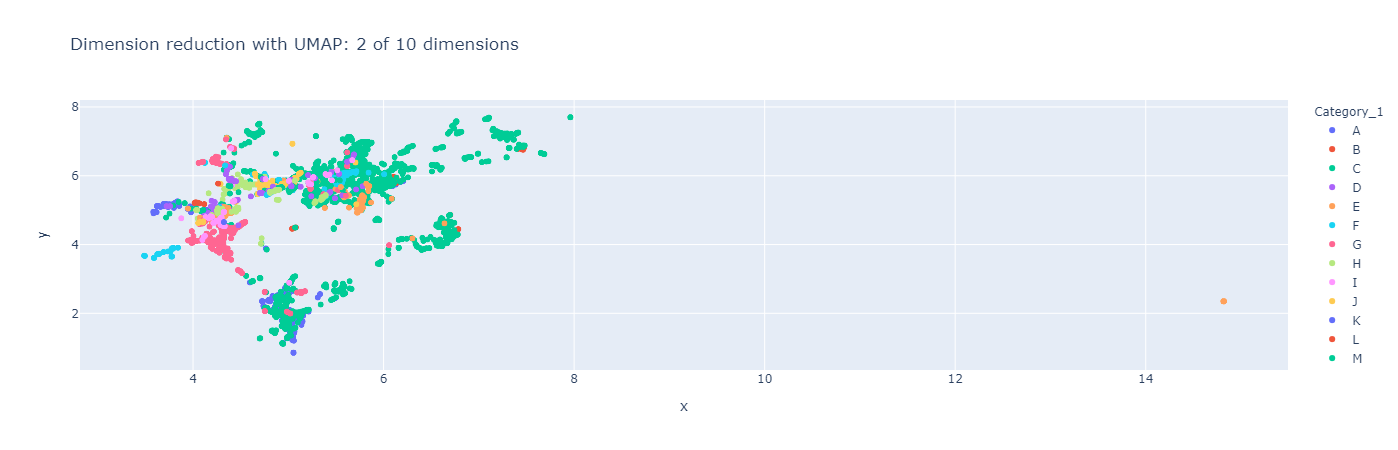

In [38]:
fig1 = text_processing.plotly_scat(df1,'1', 'Dimension reduction with UMAP: 2 of 10 dimensions')
fig1.update_layout()


2020-12-10 18:20:40,151 - text_processing - INFO - cleanded CPA File imported
2020-12-10 18:20:40,151 - text_processing - INFO - cleanded CPA File imported
2020-12-10 18:20:40,151 - text_processing - INFO - cleanded CPA File imported
2020-12-10 18:20:40,151 - text_processing - INFO - cleanded CPA File imported


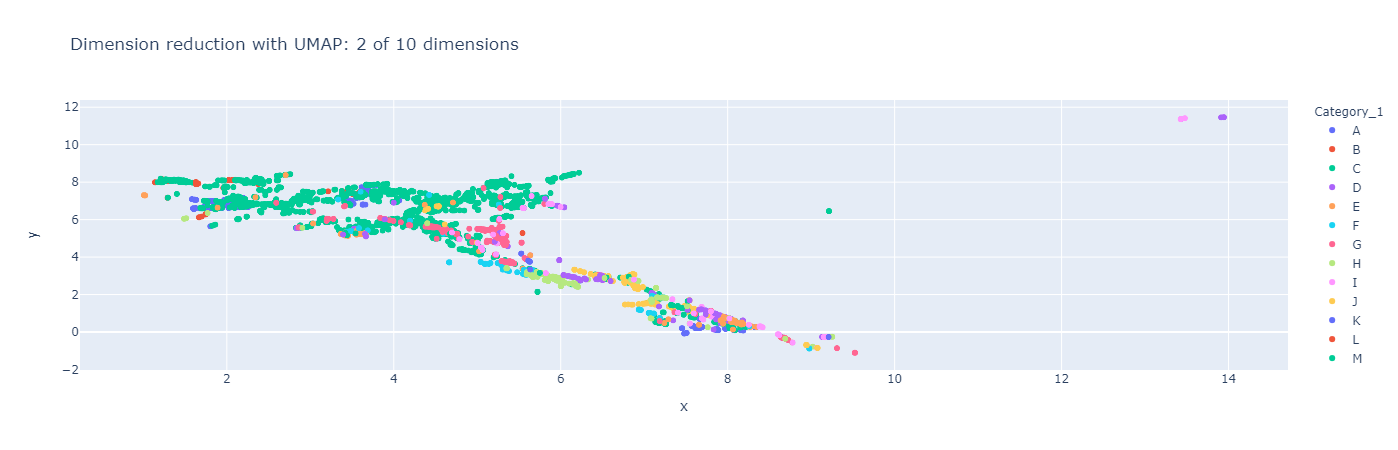

In [40]:
fig1 = text_processing.plotly_scat(df2,'1', 'Dimension reduction with UMAP: 2 of 10 dimensions')
fig1.update_layout()

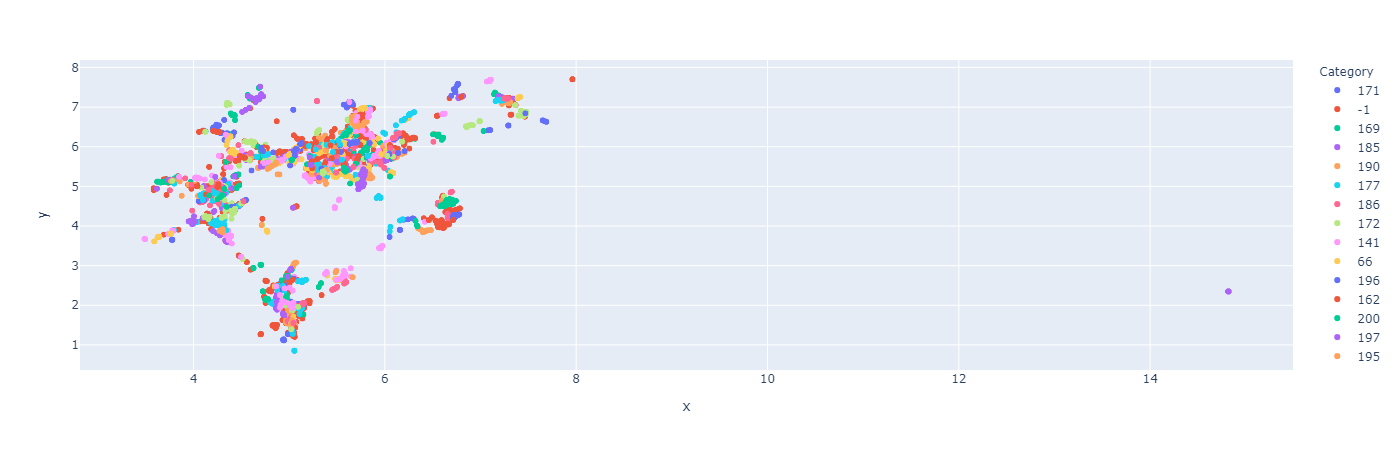

In [48]:
# add filtering
# a function to produce a scatter plot
def scat(plot_df, true_cols):
    hover = {
        "Category":False,
        "x": False,
        "y": False
        }
    for col in true_cols:
        hover[col] = True
    fig = plotly.express.scatter(
            plot_df, 
            x="x", 
            y="y", 
            color="Category",
            hover_data=hover)
    return fig
#fig1 = text_processing.plotly_scat(plot_df,'label',['Full_descr_cleaned','label'], 'Dimension reduction with UMAP: 2 of 10 dimensions')

plot_df = df1[["Category_1","Descr_cleaned", "Code", "Low_dim","label"]].copy()
plot_df['Category'] = plot_df.label.astype(str)

plot_df["x"] = plot_df.Low_dim.apply(lambda x: x[4])
plot_df["y"] = plot_df.Low_dim.apply(lambda x: x[5])

fig1 = scat(plot_df,['Descr_cleaned','label'])
fig1.update_layout()


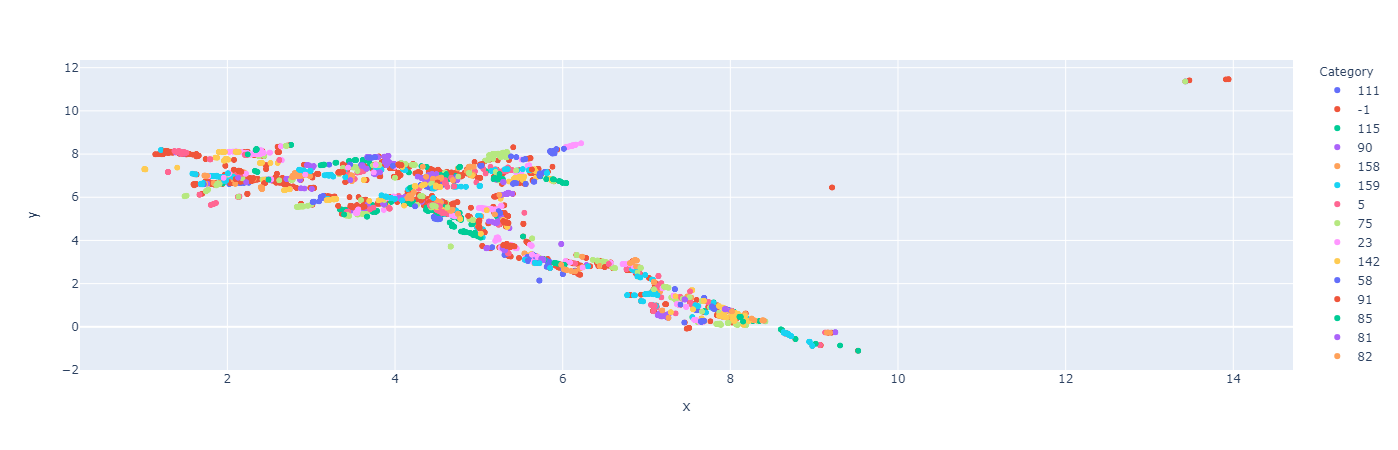

In [49]:
plot_df = df2[["Full_descr_cleaned", "Code", "Low_dim","label"]].copy()
plot_df['Category'] = plot_df.label.astype(str)

plot_df["x"] = plot_df.Low_dim.apply(lambda x: x[4])
plot_df["y"] = plot_df.Low_dim.apply(lambda x: x[5])

fig2 = scat(plot_df,['Full_descr_cleaned','label'])
fig2.update_layout()

In [50]:
def search_col(df, search_col, display_cols, st):
    st1 = st.lower()
    df1 = df[df[search_col].fillna('').str.contains(st1)]
    # display(df1[display_cols])
    return df1[display_cols]

dis_cols = ['Code','Descr_old','Descr_cleaned','label']

test1 = search_col(df1, 'Descr_cleaned', dis_cols,'caravan')
test2 = search_col(df2, 'Descr_cleaned', dis_cols,'caravan')
display(test1,test2)

Code                                          Descr_old  \
2929  29.20.22  Trailers and semi-trailers of the caravan type...   
2936  29.20.50  Fitting out services of caravans and mobile homes   
3639  45.19.12  Wholesale trade services of camping vehicles s...   
3642  45.19.22  Specialised store retail trade services of cam...   
4978  77.39.13  Rental and leasing services of motorcycles, ca...   

                                          Descr_cleaned label  
2929  trailers semi-trailers caravan type housing ca...    31  
2936             fitting services caravans mobile homes    31  
3639  wholesale trade services camping vehicles cara...    31  
3642  specialised store retail trade services campin...    31  
4978  rental leasing services motorcycles caravans c...    28

Code                                          Descr_old  \
2929  29.20.22  Trailers and semi-trailers of the caravan type...   
2936  29.20.50  Fitting out services of caravans and mobile homes   
3639  45.19.12  Wholesale trade services of camping vehicles s...   
3642  45.19.22  Specialised store retail trade services of cam...   
4978  77.39.13  Rental and leasing services of motorcycles, ca...   

                                          Descr_cleaned label  
2929  trailers semi-trailers caravan type housing ca...    48  
2936             fitting services caravans mobile homes    -1  
3639  wholesale trade services camping vehicles cara...    -1  
3642  specialised store retail trade services campin...    -1  
4978  rental leasing services motorcycles caravans c...    -1

In [51]:
def search_label(df, cols, lab):
    lab = str(lab)
    df1 = df[(df.label==lab)]
    display(HTML(f'<h3>These are all the low level items with label {lab}</h3>'))
    display(df1[cols])
    
search_label(df1, dis_cols,31)

Code                                          Descr_old  \
2750  28.30.70  Self-loading or unloading trailers and semi-tr...   
2909  29.10.24  Other motor vehicles for the transport of persons   
2918  29.10.51                                      Crane lorries   
2929  29.20.22  Trailers and semi-trailers of the caravan type...   
2936  29.20.50  Fitting out services of caravans and mobile homes   
3623  45.11.11  Wholesale trade services of passenger motor ve...   
3624  45.11.12  Wholesale trade services of specialised passen...   
3626  45.11.21  Specialised store retail trade services of new...   
3627  45.11.22  Specialised store retail trade services of use...   
3628  45.11.23  Specialised store retail trade services of new...   
3629  45.11.24  Specialised store retail trade services of use...   
3631  45.11.31  Internet retail trade services of cars and lig...   
3632  45.11.39  Other retail trade services of cars and light ...   
3638  45.19.11  Wholesale trade services of lorries, trucks, t...   
3639  45.19.12  Wholesale trade services of camping vehicles s...   
3641  45.19.21  Specialised store retail trade services of lor...   
3642  45.19.22  Specialised store retail trade services of cam...   
3644  45.19.31  Internet retail trade services of other motor ...   
3645  45.19.39  Other retail trade services of motor vehicles ...   
3666  45.31.12  Wholesale trade services of other motor vehicl...   
3671  45.32.11   Specialised store retail trade services of tyres   
3672  45.32.12  Specialised store retail trade services of oth...   
3674  45.32.21  Internet retail trade services of parts and ac...   
3675  45.32.22  Mail order retail trade services of parts and ...   
3676  45.32.29  Other retail trade services of parts and acces...   
3878  46.69.11  Wholesale trade services of transport equipmen...   
3889  46.71.12  Wholesale trade services of motor spirit, incl...   
3994  47.00.81           Retail trade services of automotive fuel   

                                          Descr_cleaned label  
2750  self-loading unloading trailers semi-trailers ...    31  
2909                   motor vehicles transport persons    31  
2918                                      crane lorries    31  
2929  trailers semi-trailers caravan type housing ca...    31  
2936             fitting services caravans mobile homes    31  
3623  wholesale trade services passenger motor vehicles    31  
3624  wholesale trade services specialised passenger...    31  
3626  specialised store retail trade services new pa...    31  
3627  specialised store retail trade services used p...    31  
3628  specialised store retail trade services new sp...    31  
3629  specialised store retail trade services used s...    31  
3631  internet retail trade services cars light moto...    31  
3632    retail trade services cars light motor vehicles    31  
3638  wholesale trade services lorries trucks traile...    31  
3639  wholesale trade services camping vehicles cara...    31  
3641  specialised store retail trade services lorrie...    31  
3642  specialised store retail trade services campin...    31  
3644      internet retail trade services motor vehicles    31  
3645               retail trade services motor vehicles    31  
3666  wholesale trade services motor vehicle parts a...    31  
3671      specialised store retail trade services tyres    31  
3672  specialised store retail trade services motor ...    31  
3674  internet retail trade services parts accessori...    31  
3675  mail order retail trade services parts accesso...    31  
3676  retail trade services parts accessories motor ...    31  
3878  wholesale trade services transport equipment m...    31  
3889  wholesale trade services motor spirit includin...    31  
3994              retail trade services automotive fuel    31

In [52]:

search_label(df2, dis_cols,48)

Code                                          Descr_old  \
2750  28.30.70  Self-loading or unloading trailers and semi-tr...   
2911  29.10.30  Motor vehicles for the transport of 10 or more...   
2918  29.10.51                                      Crane lorries   
2919  29.10.52  Vehicles for travelling on snow, golf cars and...   
2929  29.20.22  Trailers and semi-trailers of the caravan type...   
3623  45.11.11  Wholesale trade services of passenger motor ve...   
3624  45.11.12  Wholesale trade services of specialised passen...   
3628  45.11.23  Specialised store retail trade services of new...   
3629  45.11.24  Specialised store retail trade services of use...   
3638  45.19.11  Wholesale trade services of lorries, trucks, t...   
3641  45.19.21  Specialised store retail trade services of lor...   
4778  71.20.14  Technical inspection services of road transpor...   
4936  77.11.10  Rental and leasing services of cars and light ...   
4939  77.12.11  Rental and leasing services of goods transport...   
5232  85.53.11                        Car driving school services   

                                          Descr_cleaned label  
2750  self-loading unloading trailers semi-trailers ...    48  
2911                motor vehicles transport 10 persons    48  
2918                                      crane lorries    48  
2919    vehicles travelling snow golf cars like engines    48  
2929  trailers semi-trailers caravan type housing ca...    48  
3623  wholesale trade services passenger motor vehicles    48  
3624  wholesale trade services specialised passenger...    48  
3628  specialised store retail trade services new sp...    48  
3629  specialised store retail trade services used s...    48  
3638  wholesale trade services lorries trucks traile...    48  
3641  specialised store retail trade services lorrie...    48  
4778  technical inspection services road transport v...    48  
4936  rental leasing services cars light motor vehicles    48  
4939  rental leasing services goods transport vehicl...    48  
5232                        car driving school services    48

In [53]:
pd.set_option('display.max_colwidth', None)

In [77]:

t1 = widgets.ToggleButtons(
    options=[('Descriptions only',1), ('Descriptions with Inclusions',2)],
    value = 1,
    layout=Layout(width='40%', height='80px')
)

t2 = widgets.ToggleButtons(
    options=[('Code',1), ('Descriptions',2)],
    value = 2,
    layout=Layout(width='50%', height='80px')
)

t = VBox([t1, t2])
t1.style.button_width='300px'
t1.style.button_height='100px'


sty = {'description_width': '600px'}

w1 = HBox([Label('Text to analyse:'),t], style=sty)

In [93]:
def get_df():
    search_str = textbox.value
    result1 = t1.value
    this_df = df1
    if result1==2:
        this_df = df2

    result2 = t2.value
    col = 'Descr_cleaned'
    found_df = text_processing.search_col(this_df, col, search_str)
    if result2==1:
        col = 'Code'
        found_df = text_processing.show_group(this_df, col, search_str)
    return found_df

num_slider = widgets.IntSlider(
    value=5,
    min=1.,
    max=40,
    step=1,
    description='Number of lines:',
#    readout_format='.0f',
)
textbox = widgets.Text(
    value='Caravan',
    description='Search string:',
)
textbox2 = widgets.Text(
    value='36',
    description='Choose label:',
)

button = widgets.Button(description='Display Chart')
button2 = widgets.Button(description='Select Label')
out2 = widgets.Output()
def on_button_clicked(b):
    button.description = 'clicked'
    with out2:
        out2.clear_output()
        found_df = get_df()
        display(found_df.head(num_slider.value))
        
def on_button_clicked2(b):
    button2.description = 'clicked'
    with out2:
        search_label(this_df, dis_cols,textbox2.value)
        #display(found_df.head(num_slider.value))

button.on_click(on_button_clicked)
button2.on_click(on_button_clicked2)
#widgets.VBox([button, num_slider, out2])
tab1 = VBox(children=[w1,
                      textbox,
                      num_slider,
                      button
                      ])
tab2 = VBox(children=[t,
                      HBox(children=[textbox,
                                     num_slider,
                                    button]),
                       HBox(children=[textbox2,
                                    button2]),                     
                                     ])
tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'Search Dataframe')
tab.set_title(1, 'Cluster analysis')
VBox(children=[tab, out2])